#  Cognifyz Technologies
## Data Science Internship
## Level 02 - Task 01
*Import Libraries*

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO

### *Choose Dataset from Local Directory*

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Dataset .csv to Dataset .csv


###*Percentage of restaurants offering both table booking and online delivery*

In [26]:
df = pd.read_csv("Dataset .csv")
total_restaurants = len(df)
both_services = df[(df["Has Table booking"] == "Yes") & (df["Has Online delivery"] == "Yes")]
percentage_both_services = (len(both_services) / total_restaurants) * 100
print(f"Table Booking Available: {table_booking_pct:.1f}%")
print(f"Online Delivery Available: {online_delivery_pct:.1f}%")
print(f"Both Services Available: {both_pct:.1f}%\n")

Table Booking Available: 12.1%
Online Delivery Available: 25.7%
Both Services Available: 4.6%



### *Average rating comparison for restaurants with and without table booking*

In [35]:
avg_ratings = df.groupby("Has Table booking")["Aggregate rating"].mean()

avg_rating_with_booking = avg_ratings.get("Yes", 0)
avg_rating_without_booking = avg_ratings.get("No", 0)
both_average = (avg_rating_with_booking + avg_rating_without_booking) / 2

print(f"Average rating with table booking: {avg_rating_with_booking:.2f}")
print(f"Average rating without table booking: {avg_rating_without_booking:.2f}")
print(f"Both average rating: {both_average:.2f}")



Average rating with table booking: 3.44
Average rating without table booking: 2.56
Both average rating: 3.00


### *Online delivery availability across price ranges*

Online Delivery by Price Range
Price Range No: 76.2%
Price Range Yes: 23.8%


<Figure size 1000x600 with 0 Axes>

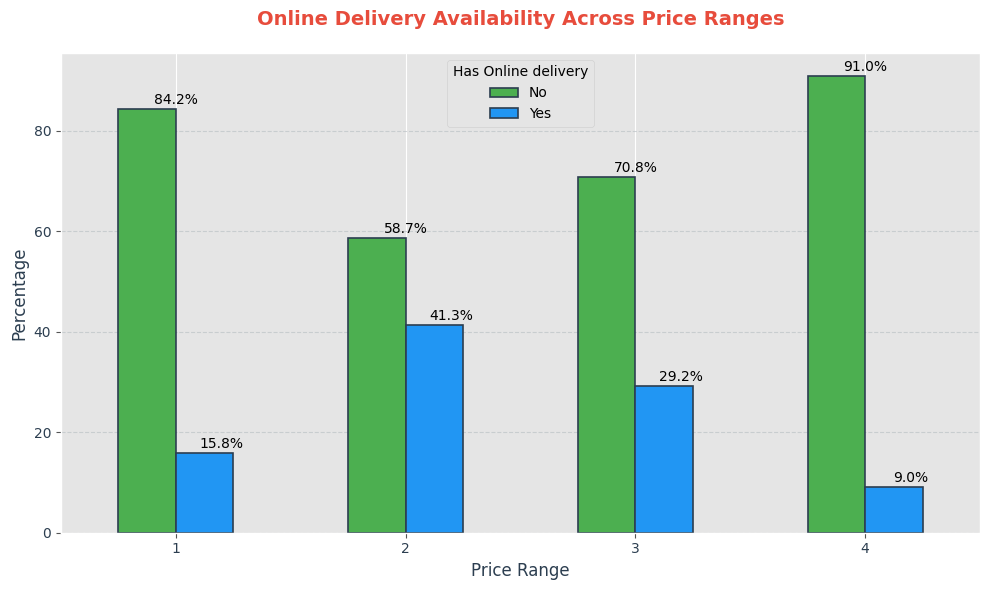

In [50]:
online_delivery_by_price = df.groupby("Price range")["Has Online delivery"].value_counts(normalize=True).unstack() * 100
price_analysis = online_delivery_by_price.mean()
print("Online Delivery by Price Range")
for price, pct in price_analysis.items():
    print(f"Price Range {price}: {pct:.1f}%")

plt.style.use("ggplot")
plt.figure(figsize=(10, 6))
bar_colors = ['#4CAF50', '#2196F3', '#9C27B0', '#FF9800']
edge_color = '#2C3E50'
text_color = '#2C3E50'
online_delivery_by_price.plot(kind='bar',
                             color=bar_colors,
                             edgecolor=edge_color,
                             linewidth=1.2,
                             figsize=(10, 6))

plt.xlabel("Price Range", fontsize=12, color=text_color)
plt.ylabel("Percentage", fontsize=12, color=text_color)
plt.title("Online Delivery Availability Across Price Ranges",
          fontsize=14,
          fontweight='bold',
          color='#E74C3C',
          pad=20)

plt.xticks(rotation=0, fontsize=10, color=text_color)
plt.yticks(fontsize=10, color=text_color)
plt.grid(axis='y', linestyle='--', alpha=0.7, color='#BDC3C7')

for index, values in enumerate(online_delivery_by_price.itertuples()):
    for i, value in enumerate(values[1:]):
        plt.text(index + i * 0.2,
                 value + 1,
                 f'{value:.1f}%',
                 ha='center',
                 fontsize=10,
                 color='black')


plt.tight_layout()
plt.show()